# Julia sets of quadratic polynomials

The purpose of this notebook is to explore visually some filled-in Julia sets of quadratic polynomials. 

We begin with a definition. Given $f: \mathbb{C} \rightarrow \mathbb{C}$ such that $f(z) = z^{2} + c$, where $c \in \mathbb{C}$, the filled-in Julia set of $f$, denoted by $\mathcal{K}(f)$ is defined as the set of complex numbers whose orbit remains bounded under iteration:

$$ \mathcal{K}(f) = \{ z \in \mathbb{C} : \{f^{\circ n}(z)\} \text{  is bounded  } \} $$

If, on the contrary, the orbit of $z$ is unbounded, we say that it belongs to the set $A_{f}(\infty)$, which is called the basin of attraction to infinity:

$$ A_{f}(\infty) = \{ z \in \mathbb{C} : \{f^{\circ n}(z)\} \rightarrow \infty \} $$

We have that the Julia set of $f$, denoted by $\mathcal{J}(f)$ is the common boundary of these two sets:

$$ \mathcal{J}(f) = \partial A_{f} (\infty) = \partial \mathcal{K}(f) $$

If $\text{int} ( \mathcal{K} (f) ) = \varnothing$, then $\mathcal{K}(f) = \mathcal{J}(f)$.
In some sense, the Julia set contains points whose neighborhoods, no matter how small, exhibit chaotic behavior under iteration. 
The set $A_{f}(\infty)$ is open, connected and unbounded.

Los siguientes dos lemas serán útiles para demostrar el teorema 1:

***
**Lema 1.** Para cualesquiera $a, b \in \mathbb{C}$, tenemos que $|a + b| \geq|a| - |b|$.

*Demostración*. $|a| = |a + b - b| \leq |a + b| + |-b| = |a + b| + |b|$. De lo que podemos deducir que $|a+b| \geq |a| - |b|$. 
                                                                                $\square$
***

***
**Lema 2.** Considérese $f(z) = z^{2} + c$, donde $c$ es cualquier número complejo. Existe un $R \in \mathbb{R}$ tal que si $|z| > R$, entonces $|f(z)| > |z|$.

*Demostración.* Tenemos que $|f(z)| = |z^{2} + c| \geq |z|^{2} - |c|$. Si queremos que $|f(z)| > |z|$, podríamos intentar demostrar que $|z|^{2} - |c| > |z|$, es decir, $|z|^{2}  - |z| - |c| > 0$. La expresión del lado izquierdo es un polinomio de grado 2 con raíces en $\mathbb{R}$, la mayor de las cuales está dada por 

$$ R = \frac{1 + \sqrt{1 + 4|c|}}{2} $$ 

Así, si $|z| > R$, podemos estar seguros que $|z|^{2}  - |z| - |c| > 0$, es decir, $|z|^{2} - |c| > |z|$. De esto se sigue que $|f(z)| > |z|$.$ \square $
***

***

**Teorema 1**. Sea $z_{0}$ un número complejo arbitrario. Si existe un $n \in \mathbb{N}$ tal que $|f^{\circ n}(z_{0})| > R$, entonces $ \{f^{\circ n}(z_{0})\} \rightarrow \infty $ de forma que $z_{0} \in A_{f}(\infty) $ y $z_{0} \notin \mathcal{J}(f)$.


*Demostración*. 

$\square$

***

### Dependencies

In [31]:
from matplotlib.pyplot import figure, axis, imshow
from numpy import linspace, empty
from math import sqrt

We define a function $\texttt{julia}$ which will give us either the number of iterations that it took for a point to escape the disk of radius $\texttt{r}$, or 

In [32]:
def julia(z0, c, maxiter, r):
    for n in range(maxiter):
        if abs(z0) > r:
            break;
        else:
            z0 = z0*z0 + c
    return n        

We now define two functions: $\texttt{createImage}$ and $\texttt{plotFunction}$

### The filled-in Julia set of  $z^{2} - 0.8 + 0.156i$

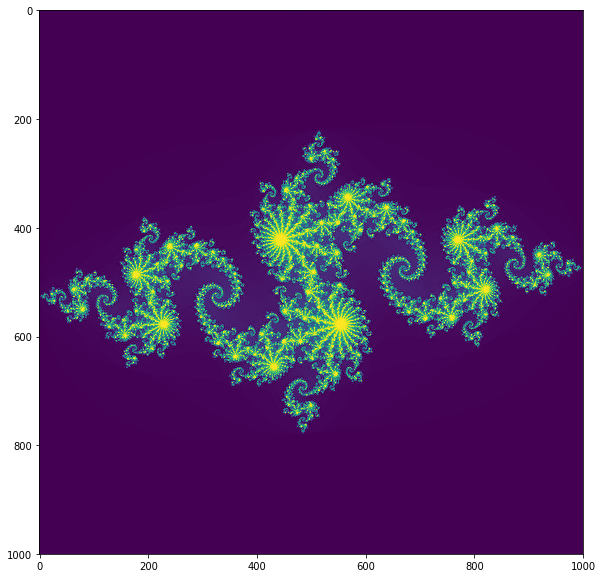

In [33]:
c = complex(-0.8, 0.156)

R = (1 + sqrt(1 + 4*abs(c)))/2 # radius of the disk in which the filled-in Julia is contained

xvalues = linspace(-R, R, 1000)
yvalues = linspace(-R, R, 1000)
xlen = len(xvalues)
ylen = len(yvalues)

atlas = empty((xlen, ylen))

for ix in range(xlen):
    for iy in range(ylen):
            re = xvalues[ix]
            im = yvalues[iy]
            z = complex(re, im)
            atlas[ix, iy] = julia(z, c, 300, R)
           
figure(figsize=(10,10))        
imshow(atlas.T, interpolation="sinc")            

### Plotting

In [9]:
def mandelbrot(c, maxiter):
    z = complex(0, 0)
    
    for n in range(maxiter):
        z = z*z + c
        
        if abs(z) > 4:
            break
            pass
        
        pass
    
    return n

In [12]:
xvalues = linspace(-2.25, 0.75, 1500)
yvalues = linspace(-1.5, 1.5, 1500)

xlen = len(xvalues)
ylen= len(yvalues)

atlas = empty((xlen, ylen))

for ix in range(xlen):
    for iy in range(ylen):
        
        cx = xvalues[ix]
        cy = yvalues[iy]
        c = complex(cx, cy)
        
        atlas[ix, iy] = mandelbrot(c, 500)

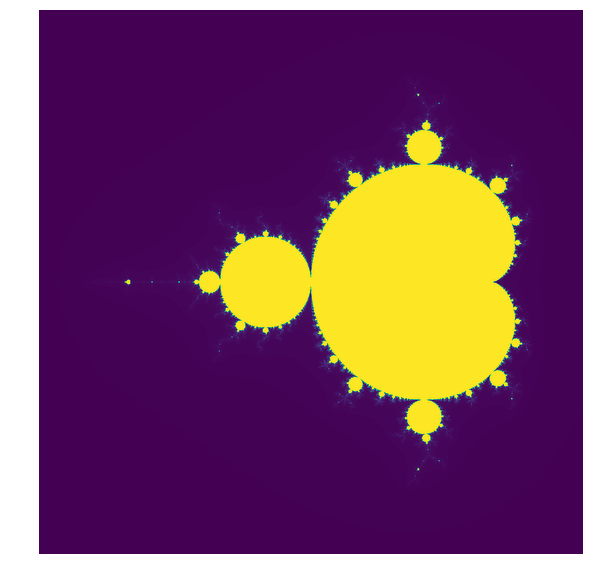

In [13]:
figure(figsize=(10,10))
axis('off')
imshow(atlas.T, interpolation="lanczos")

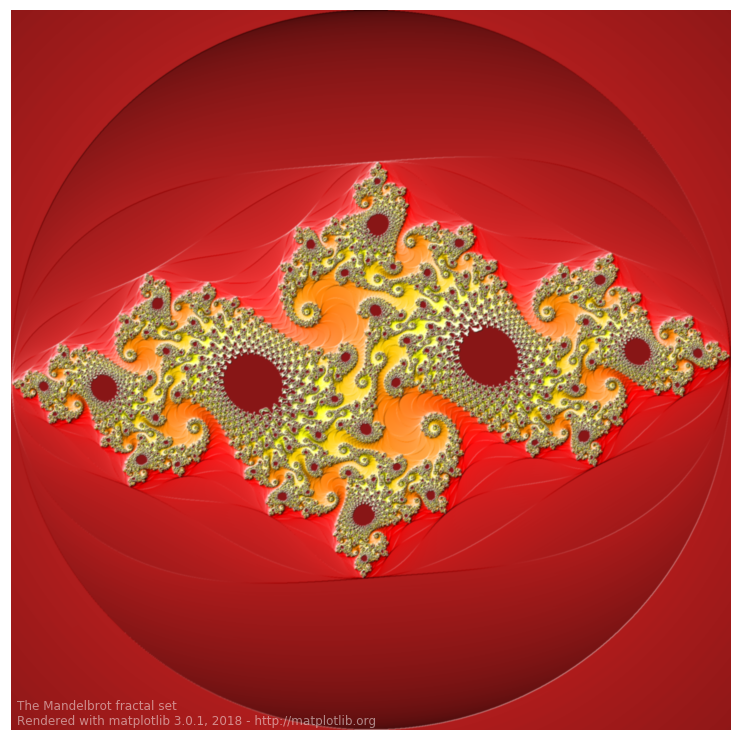

In [15]:
import numpy as np

def julia_set(c, xn, yn, maxiter, radius):
    X = np.linspace(-radius, radius, xn).astype(np.float32)
    Y = np.linspace(-radius, radius, yn).astype(np.float32)
    
    #we now form the matrix of complex numbers representing the plane
    Z = X + Y[:, None]*1j
    
    #We prepare the matrix in which we'll keep the number of iterations
    N = np.zeros_like(Z, dtype = int)
    
    for n in range(maxiter):
        #Get those numbers which are outside the disk
        I = np.less(abs(Z), radius)
        
        #Mark the orbit for those numbers
        N[I] = n
        
        Z[I] = Z[I]**2 + c    
    return Z, N    

import time
import matplotlib
from matplotlib import colors
import matplotlib.pyplot as plt
from math import sqrt

c = -0.74543 + 0.11301j

R = (1 + sqrt(1 + 4*abs(c)))/2
Z, N = julia_set(c, 1750, 1750, 200, R)

log_horizon = np.log(np.log(R))/np.log(2)

with np.errstate(invalid='ignore'):
        M = np.nan_to_num(N + 1 - np.log(np.log(abs(Z)))/np.log(2) + log_horizon)

dpi = 72
width = 10
height = 10
fig = plt.figure(figsize=(width, height), dpi=dpi)
ax = fig.add_axes([0.0, 0.0, 1.0, 1.0], frameon=False, aspect=1)

# Shaded rendering
light = colors.LightSource(azdeg=315, altdeg=10)
M = light.shade(M, cmap=plt.cm.hot, vert_exag=1.5, norm=colors.PowerNorm(0.3), blend_mode='hsv')
plt.imshow(M, extent=[-R, R, -R, R], interpolation="bicubic")
ax.set_xticks([])
ax.set_yticks([])

# Some advertisement for matplotlib
year = time.strftime("%Y")
text = ("The Mandelbrot fractal set\n" "Rendered with matplotlib %s, %s - http://matplotlib.org"% (matplotlib.__version__, year))
ax.text(-R +.025, -R +.025, text, color="white", fontsize=12, alpha=0.5)

plt.show()
    

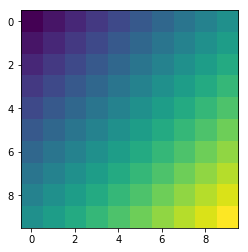

In [11]:
x = np.linspace(-2, 2, 10)
y = np.linspace(-2, 2, 10)

from matplotlib.pyplot import imshow

imshow(x + y[:, None], interpolation="nearest")